In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skbio 
import seaborn as sns
sns.set()
import scipy.stats as stats
from skbio.stats import subsample_counts

In [154]:
data = pd.read_csv('/Users/sveerisetti/Desktop/relative_abundance.csv').dropna(1)
data.rename(columns = {'Sample ID':'Sample_ID', 'Total 16S copies':'Total_16s_Reads'}, inplace=True)
data

/var/folders/qj/q80cnm5j5mgd448km33pk9vw0000gn/T/ipykernel_49490/3003739505.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data = pd.read_csv('/Users/sveerisetti/Desktop/relative_abundance.csv').dropna(1)


,Sample_ID,Alpha 2.1,Halomonadaceae,Bartonella,Bifidobacterium,Klebsiella,Serratia,Frischella,Gilliamella,Zymobacter,Fructobacillus,Lactobacillus Firm_4,Lactobacillus Firm_5,Lactobacillus kunkeei,Snodgrassella
0,HC1_0,0.0004,0.0000,0.0004,0.1980,0.0000,0.0014,0.0000,0.2636,0.0000,0.0000,0.0492,0.4652,0.0000,0.0218
1,HC10_0,0.0000,0.0000,0.0002,0.0570,0.0002,0.0002,0.0012,0.1056,0.0000,0.0066,0.1494,0.6314,0.0000,0.0482
2,HC11_0,0.0074,0.0000,0.0000,0.0998,0.0000,0.0000,0.0004,0.2020,0.0000,0.0002,0.0728,0.5930,0.0004,0.0240
3,HC12_0,0.0086,0.0000,0.4662,0.0600,0.0000,0.0000,0.0000,0.0636,0.0000,0.0022,0.0332,0.2832,0.0000,0.0830
4,HC13_0,0.0188,0.0000,0.2440,0.0906,0.0000,0.0000,0.0000,0.1406,0.0000,0.0020,0.0348,0.2968,0.0000,0.1718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,HT5_D7,0.0004,0.0000,0.0000,0.0014,0.0002,0.0012,0.1628,0.3086,0.0000,0.0006,0.0774,0.2800,0.0002,0.1672
111,HT6_D7,0.0188,0.0000,0.0002,0.0008,0.0000,0.0004,0.0000,0.6344,0.0000,0.0000,0.0226,0.3190,0.0000,0.0038
112,HT7_D7,0.0570,0.0004,0.0008,0.0482,0.0000,0.0006,0.1432,0.0456,0.0000,0.0006,0.0302,0.0478,0.0008,0.6248
113,HT8_D7,0.0006,0.0000,0.0002,0.0020,0.0000,0.0000,0.0000,0.5142,0.0000,0.0010,0.0210,0.2538,0.0000,0.2072


In [155]:
#Here we want to create a new column where we can seperate each sample based on the Day. We can append the Day value to a new column named Day
conditions = [
    (data['Sample_ID'].str.contains("D0")),
    (data['Sample_ID'].str.contains("D1")),
    (data['Sample_ID'].str.contains("D2")),
    (data['Sample_ID'].str.contains("D3")),
    (data['Sample_ID'].str.contains("D4")),
    (data['Sample_ID'].str.contains("D5")),
    (data['Sample_ID'].str.contains("D6")),
    (data['Sample_ID'].str.contains("D7")),
    
    ]

# Here we create a list of the values we want to assign for each condition
values = ["0", "1", '2', '3', '4', '5', '6', '7']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Day'] = np.select(conditions, values)
Day = data.Day

#Display
data

,Sample_ID,Alpha 2.1,Halomonadaceae,Bartonella,Bifidobacterium,Klebsiella,Serratia,Frischella,Gilliamella,Zymobacter,Fructobacillus,Lactobacillus Firm_4,Lactobacillus Firm_5,Lactobacillus kunkeei,Snodgrassella,Day
0,HC1_0,0.0004,0.0000,0.0004,0.1980,0.0000,0.0014,0.0000,0.2636,0.0000,0.0000,0.0492,0.4652,0.0000,0.0218,0
1,HC10_0,0.0000,0.0000,0.0002,0.0570,0.0002,0.0002,0.0012,0.1056,0.0000,0.0066,0.1494,0.6314,0.0000,0.0482,0
2,HC11_0,0.0074,0.0000,0.0000,0.0998,0.0000,0.0000,0.0004,0.2020,0.0000,0.0002,0.0728,0.5930,0.0004,0.0240,0
3,HC12_0,0.0086,0.0000,0.4662,0.0600,0.0000,0.0000,0.0000,0.0636,0.0000,0.0022,0.0332,0.2832,0.0000,0.0830,0
4,HC13_0,0.0188,0.0000,0.2440,0.0906,0.0000,0.0000,0.0000,0.1406,0.0000,0.0020,0.0348,0.2968,0.0000,0.1718,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,HT5_D7,0.0004,0.0000,0.0000,0.0014,0.0002,0.0012,0.1628,0.3086,0.0000,0.0006,0.0774,0.2800,0.0002,0.1672,7
111,HT6_D7,0.0188,0.0000,0.0002,0.0008,0.0000,0.0004,0.0000,0.6344,0.0000,0.0000,0.0226,0.3190,0.0000,0.0038,7
112,HT7_D7,0.0570,0.0004,0.0008,0.0482,0.0000,0.0006,0.1432,0.0456,0.0000,0.0006,0.0302,0.0478,0.0008,0.6248,7
113,HT8_D7,0.0006,0.0000,0.0002,0.0020,0.0000,0.0000,0.0000,0.5142,0.0000,0.0010,0.0210,0.2538,0.0000,0.2072,7


In [156]:
#Here we want to create a new column where we can seperate each sample based on the Group. We can append the Group name to a new column named Group
conditions = [
    (data['Sample_ID'].str.contains("HC") & data['Sample_ID'].str.contains('_0')),
    (data['Sample_ID'].str.contains("HT") & data['Sample_ID'].str.contains('_0')),
    (data['Sample_ID'].str.contains("C") & data['Sample_ID'].str.contains("D3")),
    (data['Sample_ID'].str.contains("T") & data['Sample_ID'].str.contains("D3")), 
    (data['Sample_ID'].str.contains("C") & data['Sample_ID'].str.contains("D5")),
    (data['Sample_ID'].str.contains("T") & data['Sample_ID'].str.contains("D5")), 
    (data['Sample_ID'].str.contains("C") & data['Sample_ID'].str.contains("D7")),
    (data['Sample_ID'].str.contains("T") & data['Sample_ID'].str.contains("D7")),  
    ]

# create a list of the values we want to assign for each condition
values = ["Control0", "Treatment0",  "Control3", "Treatment3",  "Control5", "Treatment5", "Control7", "Treatment7"]

# create a new column and use np.select to assign values to it using our lists as arguments
data['Group'] = np.select(conditions, values)

#Display
data

#data.to_csv('/Users/sveerisetti/Desktop/trial.csv')

,Sample_ID,Alpha 2.1,Halomonadaceae,Bartonella,Bifidobacterium,Klebsiella,Serratia,Frischella,Gilliamella,Zymobacter,Fructobacillus,Lactobacillus Firm_4,Lactobacillus Firm_5,Lactobacillus kunkeei,Snodgrassella,Day,Group
0,HC1_0,0.0004,0.0000,0.0004,0.1980,0.0000,0.0014,0.0000,0.2636,0.0000,0.0000,0.0492,0.4652,0.0000,0.0218,0,Control0
1,HC10_0,0.0000,0.0000,0.0002,0.0570,0.0002,0.0002,0.0012,0.1056,0.0000,0.0066,0.1494,0.6314,0.0000,0.0482,0,Control0
2,HC11_0,0.0074,0.0000,0.0000,0.0998,0.0000,0.0000,0.0004,0.2020,0.0000,0.0002,0.0728,0.5930,0.0004,0.0240,0,Control0
3,HC12_0,0.0086,0.0000,0.4662,0.0600,0.0000,0.0000,0.0000,0.0636,0.0000,0.0022,0.0332,0.2832,0.0000,0.0830,0,Control0
4,HC13_0,0.0188,0.0000,0.2440,0.0906,0.0000,0.0000,0.0000,0.1406,0.0000,0.0020,0.0348,0.2968,0.0000,0.1718,0,Control0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,HT5_D7,0.0004,0.0000,0.0000,0.0014,0.0002,0.0012,0.1628,0.3086,0.0000,0.0006,0.0774,0.2800,0.0002,0.1672,7,Treatment7
111,HT6_D7,0.0188,0.0000,0.0002,0.0008,0.0000,0.0004,0.0000,0.6344,0.0000,0.0000,0.0226,0.3190,0.0000,0.0038,7,Treatment7
112,HT7_D7,0.0570,0.0004,0.0008,0.0482,0.0000,0.0006,0.1432,0.0456,0.0000,0.0006,0.0302,0.0478,0.0008,0.6248,7,Treatment7
113,HT8_D7,0.0006,0.0000,0.0002,0.0020,0.0000,0.0000,0.0000,0.5142,0.0000,0.0010,0.0210,0.2538,0.0000,0.2072,7,Treatment7


In [157]:
data['Bee'] = data.Sample_ID.apply(lambda x: x.split('_')[0][1:])
data = data.set_index('Sample_ID')
group = data.Group

In [158]:
data = data.drop(['Group'], axis = 1)
data = data.drop(['Day'], axis = 1)
data = data.drop(['Bee'], axis = 1)
#data = data.drop(['Total_16s_Reads'], axis = 1)

In [159]:
def SDI(x):
    "https://en.wikipedia.org/wiki/Diversity_index"
    # Get proportions (relative abundance)
    p = x / x.sum()
    return -sum(p*np.log2(p))

#In R there is already a function that does this: diversity(). Potentially save df and use R to calculate shannon index values? 

In [160]:
#Here we want to you scibio kit in order to use the alpha shannon function. The function is applied to the dataframe and the values are then 
#appended to a new column called Shannon_Index

data['Shannon_Index'] = data.apply(skbio.diversity.alpha.shannon, axis=1)
data

,Alpha 2.1,Halomonadaceae,Bartonella,Bifidobacterium,Klebsiella,Serratia,Frischella,Gilliamella,Zymobacter,Fructobacillus,Lactobacillus Firm_4,Lactobacillus Firm_5,Lactobacillus kunkeei,Snodgrassella,Shannon_Index
Sample_ID,,,,,,,,,,,,,,,
HC1_0,0.0004,0.0000,0.0004,0.1980,0.0000,0.0014,0.0000,0.2636,0.0000,0.0000,0.0492,0.4652,0.0000,0.0218,1.839697
HC10_0,0.0000,0.0000,0.0002,0.0570,0.0002,0.0002,0.0012,0.1056,0.0000,0.0066,0.1494,0.6314,0.0000,0.0482,1.684378
HC11_0,0.0074,0.0000,0.0000,0.0998,0.0000,0.0000,0.0004,0.2020,0.0000,0.0002,0.0728,0.5930,0.0004,0.0240,1.713191
HC12_0,0.0086,0.0000,0.4662,0.0600,0.0000,0.0000,0.0000,0.0636,0.0000,0.0022,0.0332,0.2832,0.0000,0.0830,2.064627
HC13_0,0.0188,0.0000,0.2440,0.0906,0.0000,0.0000,0.0000,0.1406,0.0000,0.0020,0.0348,0.2968,0.0000,0.1718,2.459990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HT5_D7,0.0004,0.0000,0.0000,0.0014,0.0002,0.0012,0.1628,0.3086,0.0000,0.0006,0.0774,0.2800,0.0002,0.1672,2.221936
HT6_D7,0.0188,0.0000,0.0002,0.0008,0.0000,0.0004,0.0000,0.6344,0.0000,0.0000,0.0226,0.3190,0.0000,0.0038,1.219440
HT7_D7,0.0570,0.0004,0.0008,0.0482,0.0000,0.0006,0.1432,0.0456,0.0000,0.0006,0.0302,0.0478,0.0008,0.6248,1.871046


In [161]:
#We want to add the group df that we saved earlier. We need the group so that we can plot the boxplots. 
data = pd.concat([data, group], axis=1)
data['Sample_ID'] = data.index

In [162]:
#There are unfilled rows that are not assigned to a group. Here, based on the Sample_ID, we want to assign the row to either Control0 or Treatment0
data.iloc[[72,73,74,75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85],[16]] = 'Control0'

In [163]:
data.iloc[[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100],[16]] = 'Treatment0'

In [164]:
data.iloc[[71],[16]] = 'Control0'

In [165]:
#For Control/Treatment Group Formation
conditions = [
    (data['Sample_ID'].str.contains("C")),
    (data['Sample_ID'].str.contains("T"))
    ]

#Here we create a list of the values we want to assign for each condition
values = ["Control", "Treatment"]

#Here we create a new column and use np.select to assign values to it using our lists as arguments
data['Variable'] = np.select(conditions, values)
#data.to_csv('/Users/sveerisetti/Desktop/trial.csv')

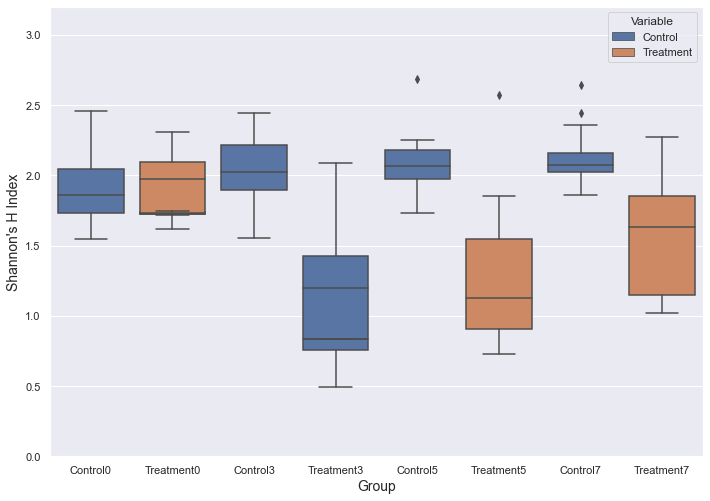

In [166]:
#Here we want to use seaborn in order to produce our histograms 
figure = sns.boxplot(data= data,
                     x= "Group", y= 'Shannon_Index', hue = 'Variable', dodge=False, 
                     order=["Control0", "Treatment0", "Control3", "Treatment3", 'Control5', 'Treatment5' ,'Control7', 'Treatment7'])
figure.set_xlabel("Group", fontsize=14)
figure.set_ylabel("Shannon's H Index", fontsize=14)
figure.set(ylim=(0, 3.2))
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [60]:
#data.to_csv('/Users/sveerisetti/Desktop/trial.csv')